In [48]:
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [49]:
if os.path.exists("sp500.csv"):
    sp500 = pd.read_csv("sp500.csv", index_col=0)
else:
    sp500 = yf.Ticker("^GSPC")
    sp500 = sp500.history(period="max")
    sp500.to_csv("sp500.csv")

In [50]:
sp500.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1950-01-03,16.66,16.66,16.66,16.66,1260000,0,0
1950-01-04,16.85,16.85,16.85,16.85,1890000,0,0
1950-01-05,16.93,16.93,16.93,16.93,2550000,0,0
1950-01-06,16.98,16.98,16.98,16.98,2010000,0,0
1950-01-09,17.08,17.08,17.08,17.08,2520000,0,0


In [51]:
# Open: Indicates the price when the market opened.
# High: Highest price during the day.
# Low: Lowest price during the day.
# Close: Indicates the price when the exchange closed.
# Volume: Indicates the total number of shares traded.

In [52]:
sp500.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,18211.0,6.823443e+02,9.445218e+02,0.00,0.000000e+00,2.318300e+02,1.168065e+03,4.804510e+03
High,18211.0,7.129154e+02,9.312689e+02,16.66,8.819000e+01,2.338900e+02,1.176980e+03,4.818620e+03
Low,18211.0,7.042580e+02,9.207492e+02,16.66,8.683000e+01,2.286900e+02,1.160950e+03,4.780040e+03
Close,18211.0,7.088617e+02,9.263384e+02,16.66,8.754500e+01,2.319400e+02,1.168065e+03,4.796560e+03
Volume,18211.0,1.068281e+09,1.671227e+09,680000.00,9.865000e+06,1.245100e+08,1.523385e+09,1.145623e+10
Dividends,18211.0,0.000000e+00,0.000000e+00,0.00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
Stock Splits,18211.0,0.000000e+00,0.000000e+00,0.00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


In [53]:
def unique_values(df, column):
    print("Unique values of '{}' column".format(column), sp500[column].unique())
    print("Unique number of values of '{}' column".format(column), sp500[column].nunique())

In [54]:
unique_values(sp500, "Dividends")

Unique values of 'Dividends' column [0]
Unique number of values of 'Dividends' column 1


In [55]:
unique_values(sp500, "Stock Splits")

Unique values of 'Stock Splits' column [0]
Unique number of values of 'Stock Splits' column 1


In [56]:
## As we can see "Dividends" and "Stock Splits" columns does not include any
## information. Thus, we have to drop these columns.

In [57]:
del sp500["Dividends"]
del sp500["Stock Splits"]

In [58]:
#To check if they deleted or not
sp500.head()

,Open,High,Low,Close,Volume
Date,,,,,
1950-01-03,16.66,16.66,16.66,16.66,1260000
1950-01-04,16.85,16.85,16.85,16.85,1890000
1950-01-05,16.93,16.93,16.93,16.93,2550000
1950-01-06,16.98,16.98,16.98,16.98,2010000
1950-01-09,17.08,17.08,17.08,17.08,2520000


In [62]:
sp500 = sp500.reset_index()
sp500.reset_index().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18211 entries, 0 to 18210
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   level_0  18211 non-null  int64         
 1   index    18211 non-null  int64         
 2   Date     18211 non-null  datetime64[ns]
 3   Open     18211 non-null  float64       
 4   High     18211 non-null  float64       
 5   Low      18211 non-null  float64       
 6   Close    18211 non-null  float64       
 7   Volume   18211 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(3)
memory usage: 1.1 MB


In [63]:
# Data type of the "date" column should be datetime
sp500['Date'] = pd.to_datetime(sp500['Date'])

In [64]:
sp500.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18211 entries, 0 to 18210
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   index   18211 non-null  int64         
 1   Date    18211 non-null  datetime64[ns]
 2   Open    18211 non-null  float64       
 3   High    18211 non-null  float64       
 4   Low     18211 non-null  float64       
 5   Close   18211 non-null  float64       
 6   Volume  18211 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(2)
memory usage: 996.0 KB


In [65]:
sp500.head()

,index,Date,Open,High,Low,Close,Volume
0,0,1950-01-03,16.66,16.66,16.66,16.66,1260000
1,1,1950-01-04,16.85,16.85,16.85,16.85,1890000
2,2,1950-01-05,16.93,16.93,16.93,16.93,2550000
3,3,1950-01-06,16.98,16.98,16.98,16.98,2010000
4,4,1950-01-09,17.08,17.08,17.08,17.08,2520000


In [66]:
indices = [x.year for x in sp500['Date'].tolist()]

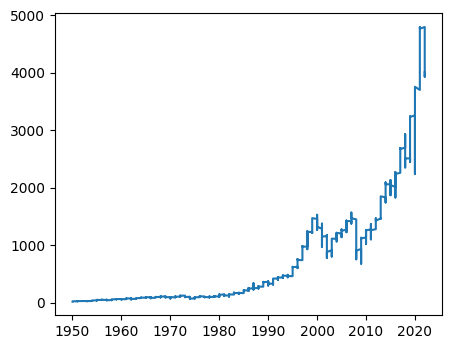

In [67]:
## Closing Price Plot
plt.figure(figsize=(5,4))

plt.plot(indices, sp500["Close"], linestyle = '-')

In [68]:
# Setting up target values.
# Our goal is will the price up or down tomorrow?

sp500["Tomorrow"] = sp500["Close"].shift(-1)

In [69]:
sp500["Target"] = (sp500["Tomorrow"] > sp500["Close"]).astype(int)

In [70]:
# There is a lot of historical data. For the stock market analysis, old data
# may not be as useful in making future prediction. 
# We will use the data after 1990.

sp500 = sp500.loc["1990-01-01":].copy()

In [71]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)

train = sp500.iloc[:-100]
test = sp500.iloc[-100:]

predictors = ["Close", "Volume", "Open", "High", "Low"]
model.fit(train[predictors], train["Target"])

RandomForestClassifier(min_samples_split=100, random_state=1)

In [72]:
from sklearn.metrics import precision_score

preds = model.predict(test[predictors])
preds = pd.Series(preds, index=test.index)
precision_score(test["Target"], preds)

0.4578313253012048

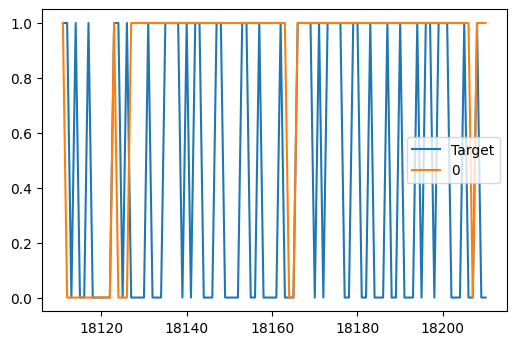

In [74]:
# 0 (orange line) is our predictions, target (blue line) is real values.

combined = pd.concat([test["Target"], preds], axis=1)
combined.plot()

In [75]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [76]:
def backtest(data, model, predictors, start=2500, step=250):
    all_predictions = []

    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
    
    return pd.concat(all_predictions)

In [77]:
predictions = backtest(sp500, model, predictors)

In [78]:
# How many days the market will down (0) and up (1)?
predictions["Predictions"].value_counts()

0    7400
1    6320
Name: Predictions, dtype: int64

In [79]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5284810126582279

In [83]:
predictions["Target"].value_counts() / predictions.shape[0]

1    0.528134
0    0.471866
Name: Target, dtype: float64

In [84]:
# Trying to predict if a stock will go up in the future.
# Is the stock price today higher than it was last week or 
# higher than it was three months ago, a year ago or five years ago?

# We'll calculate the mean close price in the last two days, 
# the last trading week which is five days
# the last three months (60 days)
# the last year
# the last four years

In [87]:
horizons = [2,5,60,250,1000]

new_preds = []

for horizon in horizons:
    rolling_averages = sp500.rolling(horizon).mean()
    
    ratio_column = f"Close_ratio_{horizon}"
    sp500[ratio_column] = sp500["Close"] / rolling_averages["Close"]
    
    trend_column = f"Trend_{horizon}"
    sp500[trend_column] = sp500.shift(1).rolling(horizon).sum()["Target"]
    
    new_preds += [ratio_column, trend_column]

In [88]:
sp500

,index,Date,Open,High,Low,Close,Volume,Tomorrow,Target,Close_ratio_2,Trend_2,Close_ratio_5,Trend_5,Close_ratio_60,Trend_60,Close_ratio_250,Trend_250,Close_ratio_1000,Trend_1000
1991,1991,1957-12-10,40.560001,40.560001,40.560001,40.560001,2360000,40.509998,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1992,1992,1957-12-11,40.509998,40.509998,40.509998,40.509998,2240000,40.549999,1,0.999383,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1993,1993,1957-12-12,40.549999,40.549999,40.549999,40.549999,2330000,40.730000,1,1.000493,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1994,1994,1957-12-13,40.730000,40.730000,40.730000,40.730000,2310000,40.119999,0,1.002215,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1995,1995,1957-12-16,40.119999,40.119999,40.119999,40.119999,2350000,39.419998,0,0.992455,1.0,0.990764,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18206,18206,2022-05-10,4035.179932,4068.820068,3958.169922,4001.050049,4630150000,3935.179932,0,1.001227,1.0,0.972892,2.0,0.918469,27.0,0.901037,132.0,1.161381,553.0
18207,18207,2022-05-11,3990.080078,4049.090088,3928.820068,3935.179932,4683220000,3930.080078,0,0.991700,1.0,0.974166,1.0,0.904963,27.0,0.886394,131.0,1.141860,553.0
18208,18208,2022-05-12,3903.949951,3964.800049,3858.870117,3930.080078,4964130000,4023.889893,1,0.999352,0.0,0.983460,1.0,0.905668,26.0,0.885431,131.0,1.139984,552.0
18209,18209,2022-05-13,3963.899902,4038.879883,3963.899902,4023.889893,4142950000,4008.010010,0,1.011794,1.0,1.011971,2.0,0.928896,26.0,0.906651,132.0,1.166756,553.0


In [89]:
sp500 = sp500.dropna()

In [90]:
sp500

,index,Date,Open,High,Low,Close,Volume,Tomorrow,Target,Close_ratio_2,Trend_2,Close_ratio_5,Trend_5,Close_ratio_60,Trend_60,Close_ratio_250,Trend_250,Close_ratio_1000,Trend_1000
2991,2991,1961-11-29,71.699997,71.699997,71.699997,71.699997,4550000,71.320000,0,0.999651,0.0,0.999052,2.0,1.043916,37.0,1.102857,151.0,1.283522,556.0
2992,2992,1961-11-30,71.320000,71.320000,71.320000,71.320000,4210000,71.779999,1,0.997343,0.0,0.994811,2.0,1.037538,37.0,1.095932,151.0,1.276016,556.0
2993,2993,1961-12-01,71.779999,71.779999,71.779999,71.779999,4420000,72.010002,1,1.003215,1.0,1.001395,2.0,1.043390,37.0,1.101890,151.0,1.283529,556.0
2994,2994,1961-12-04,72.010002,72.010002,72.010002,72.010002,4560000,71.930000,0,1.001600,2.0,1.004156,2.0,1.045806,38.0,1.104289,152.0,1.286922,556.0
2995,2995,1961-12-05,71.930000,71.930000,71.930000,71.930000,4330000,71.989998,1,0.999444,1.0,1.002537,2.0,1.043621,38.0,1.101949,151.0,1.284762,556.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18205,18205,2022-05-09,4081.270020,4081.270020,3975.479980,3991.239990,4746120000,4001.050049,1,0.983721,0.0,0.962343,2.0,0.914756,26.0,0.898738,132.0,1.158960,553.0
18206,18206,2022-05-10,4035.179932,4068.820068,3958.169922,4001.050049,4630150000,3935.179932,0,1.001227,1.0,0.972892,2.0,0.918469,27.0,0.901037,132.0,1.161381,553.0
18207,18207,2022-05-11,3990.080078,4049.090088,3928.820068,3935.179932,4683220000,3930.080078,0,0.991700,1.0,0.974166,1.0,0.904963,27.0,0.886394,131.0,1.141860,553.0
18208,18208,2022-05-12,3903.949951,3964.800049,3858.870117,3930.080078,4964130000,4023.889893,1,0.999352,0.0,0.983460,1.0,0.905668,26.0,0.885431,131.0,1.139984,552.0


In [91]:
# Improving model

model = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)

In [92]:
# predict_proba return a probability that the row will be a zero or one.

def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict_proba(test[predictors])[:,1]
    preds[preds >= .6] = 1
    preds[preds < .6] = 0
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [93]:
predictions = backtest(sp500, model, new_preds)

In [94]:
# How many days the market will down (0) and up (1)?
# There's only a few days that we predicted the price will go up.
predictions["Predictions"].value_counts()

0.0    10613
1.0     2106
Name: Predictions, dtype: int64

In [95]:
# Model predicts that the price will go up %57 percent of the time
precision_score(predictions["Target"], predictions["Predictions"])

0.5740740740740741